<h1><center>Shopee : Marketing Analysis</center><h1>

## Project Team – Over30
- Donal Ngo         
- Lee Seng            
- Teerapong        
- Wilson Lum Kok Keong   
<br><br>

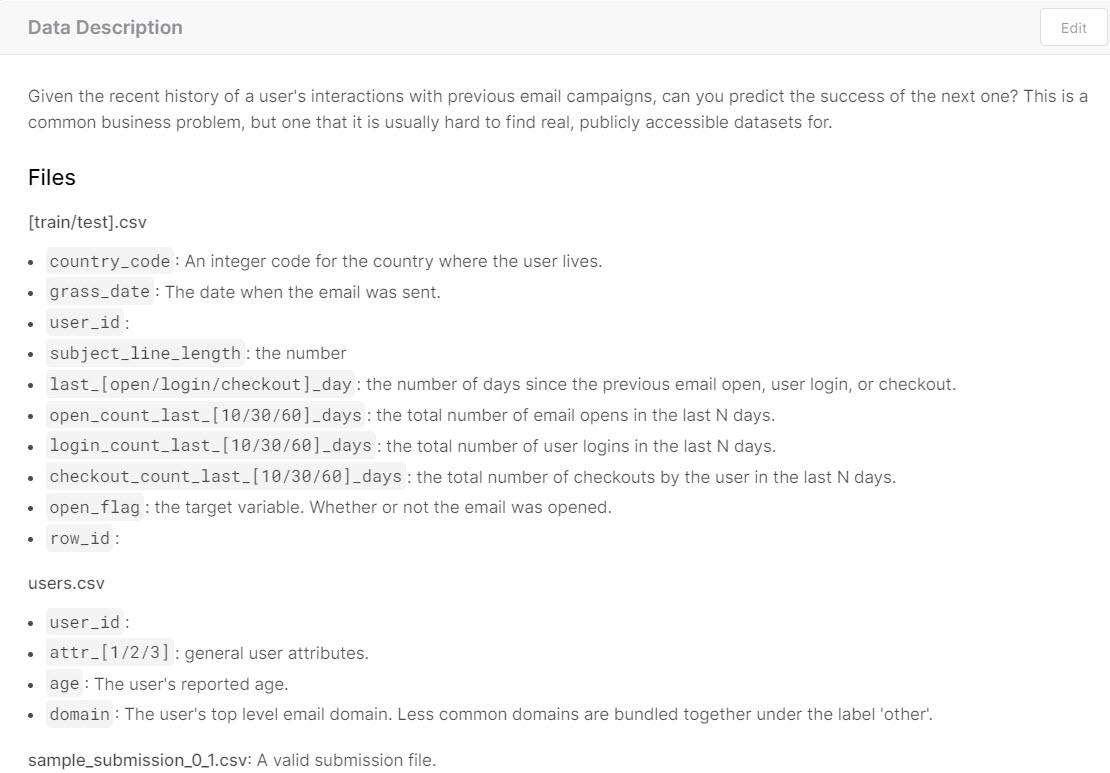

In [1]:
from IPython.display import Image
Image(filename='diagram/Data_description.JPG')

<h2><center>Model Training & Testing</center><h2>

## Import Library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# plot matplotlib graph
%matplotlib inline

#=========================================================================
# Next, we will import the required modules. Then we will define a generic 
# classification function, which takes a model as input and determines the 
# Accuracy and Cross-Validation scores.
#=========================================================================

#Import models from scikit learn module:
from sklearn.model_selection import KFold   #For K-fold cross validation
from sklearn import metrics 
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import classification_report
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from matplotlib import pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.ensemble.gradient_boosting import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
import pickle
from sklearn.externals import joblib

# import warnings filter
from warnings import simplefilter
import warnings
from pandas.core.common import SettingWithCopyWarning

# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

# ignore all DataConversionWarning warnings
warnings.filterwarnings(action='ignore', category=SettingWithCopyWarning)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.ensemble.gradient_boosting module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.ensemble. Anything that cannot be imported from sklearn.ensemble is now part of the private API.
  warnings.warn(message, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


## Reading dataset

In [2]:
#=========================================================================
# Read train data using pandas and first 5 rows of data
#=========================================================================

xls1    = pd.ExcelFile('data/test_dataset2_scaled.xlsx')
X_train = pd.read_excel(xls1, 'X_train_scaled')

dataset = X_train
features = ['attr_2', 'attr_3', 'subject_line_length', 'last_open_day',
       'last_login_day', 'last_checkout_day', 'open_count_last_10_days',
       'open_count_last_30_days', 'open_count_last_60_days',
       'login_count_last_10_days', 'login_count_last_30_days',
       'login_count_last_60_days', 'checkout_count_last_10_days',
       'checkout_count_last_30_days', 'checkout_count_last_60_days', 'weekday',
       'domain_@163.com', 'domain_@gmail.com', 'domain_@hotmail.com',
       'domain_@icloud.com', 'domain_@live.com', 'domain_@outlook.com',
       'domain_@qq.com', 'domain_@rocketmail.com', 'domain_@yahoo.com',
       'domain_@ymail.com', 'domain_other', 'country_code_1', 'country_code_2',
       'country_code_3', 'country_code_4', 'country_code_5', 'country_code_6',
       'country_code_7']

dataset['row_id']    = '--'
dataset['open_flag'] = '--'

dataset.head()

,attr_2,attr_3,subject_line_length,last_open_day,last_login_day,last_checkout_day,open_count_last_10_days,open_count_last_30_days,open_count_last_60_days,login_count_last_10_days,...,domain_other,country_code_1,country_code_2,country_code_3,country_code_4,country_code_5,country_code_6,country_code_7,row_id,open_flag
0,0.050837,-1.038883,-0.714046,-0.261210,-0.148420,-0.600874,0.089045,-0.316465,-0.425837,0.106912,...,-0.151201,-0.675049,-0.510358,-0.463877,-0.379728,-0.310000,4.317866,-0.200473,--,--
1,0.050837,-1.038883,-0.714046,-0.339048,-0.139768,-0.143067,-0.319677,-0.632253,-0.702147,-0.271071,...,-0.151201,-0.675049,-0.510358,-0.463877,-0.379728,-0.310000,4.317866,-0.200473,--,--
2,0.050837,0.915217,-1.611383,-0.233967,-0.151305,-0.613247,-0.728400,-0.790147,-0.794251,0.333702,...,-0.151201,-0.675049,-0.510358,-0.463877,-0.379728,3.225804,-0.231596,-0.200473,--,--
3,0.050837,0.915217,-0.624312,-0.121103,-0.139768,-0.610772,-0.728400,-0.790147,-0.794251,2.601603,...,-0.151201,1.481375,-0.510358,-0.463877,-0.379728,-0.310000,-0.231596,-0.200473,--,--
4,0.050837,-1.038883,-1.790850,-0.342939,-0.139768,-0.550144,-0.728400,-0.790147,-0.794251,-0.346668,...,-0.151201,-0.675049,-0.510358,-0.463877,-0.379728,3.225804,-0.231596,-0.200473,--,--


In [3]:
X_train.columns

Index(['attr_2', 'attr_3', 'subject_line_length', 'last_open_day',
       'last_login_day', 'last_checkout_day', 'open_count_last_10_days',
       'open_count_last_30_days', 'open_count_last_60_days',
       'login_count_last_10_days', 'login_count_last_30_days',
       'login_count_last_60_days', 'checkout_count_last_10_days',
       'checkout_count_last_30_days', 'checkout_count_last_60_days', 'weekday',
       'domain_@163.com', 'domain_@gmail.com', 'domain_@hotmail.com',
       'domain_@icloud.com', 'domain_@live.com', 'domain_@outlook.com',
       'domain_@qq.com', 'domain_@rocketmail.com', 'domain_@yahoo.com',
       'domain_@ymail.com', 'domain_other', 'country_code_1', 'country_code_2',
       'country_code_3', 'country_code_4', 'country_code_5', 'country_code_6',
       'country_code_7', 'row_id', 'open_flag'],
      dtype='object')

In [4]:
dataset_copy = dataset.copy()
dataset_copy = pd.DataFrame(dataset_copy)
dataset_copy

,attr_2,attr_3,subject_line_length,last_open_day,last_login_day,last_checkout_day,open_count_last_10_days,open_count_last_30_days,open_count_last_60_days,login_count_last_10_days,...,domain_other,country_code_1,country_code_2,country_code_3,country_code_4,country_code_5,country_code_6,country_code_7,row_id,open_flag
0,0.050837,-1.038883,-0.714046,-0.261210,-0.148420,-0.600874,0.089045,-0.316465,-0.425837,0.106912,...,-0.151201,-0.675049,-0.510358,-0.463877,-0.379728,-0.310000,4.317866,-0.200473,--,--
1,0.050837,-1.038883,-0.714046,-0.339048,-0.139768,-0.143067,-0.319677,-0.632253,-0.702147,-0.271071,...,-0.151201,-0.675049,-0.510358,-0.463877,-0.379728,-0.310000,4.317866,-0.200473,--,--
2,0.050837,0.915217,-1.611383,-0.233967,-0.151305,-0.613247,-0.728400,-0.790147,-0.794251,0.333702,...,-0.151201,-0.675049,-0.510358,-0.463877,-0.379728,3.225804,-0.231596,-0.200473,--,--
3,0.050837,0.915217,-0.624312,-0.121103,-0.139768,-0.610772,-0.728400,-0.790147,-0.794251,2.601603,...,-0.151201,1.481375,-0.510358,-0.463877,-0.379728,-0.310000,-0.231596,-0.200473,--,--
4,0.050837,-1.038883,-1.790850,-0.342939,-0.139768,-0.550144,-0.728400,-0.790147,-0.794251,-0.346668,...,-0.151201,-0.675049,-0.510358,-0.463877,-0.379728,3.225804,-0.231596,-0.200473,--,--
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55965,0.050837,-1.038883,0.901161,3.525579,-0.142652,-0.607060,-0.728400,-0.790147,-0.794251,-0.649055,...,-0.151201,-0.675049,-0.510358,-0.463877,-0.379728,-0.310000,4.317866,-0.200473,--,--
55966,0.050837,-1.038883,0.901161,-0.136670,2.158863,0.876481,-0.728400,-0.790147,-0.702147,-0.649055,...,-0.151201,-0.675049,-0.510358,-0.463877,-0.379728,-0.310000,4.317866,-0.200473,--,--
55967,0.050837,-1.038883,0.003824,3.525579,-0.134000,1.857672,-0.728400,-0.790147,-0.794251,-0.649055,...,-0.151201,-0.675049,-0.510358,-0.463877,-0.379728,-0.310000,4.317866,-0.200473,--,--
55968,0.050837,-1.038883,0.003824,-0.346831,-0.139768,-0.609535,0.089045,-0.000677,0.495196,-0.649055,...,-0.151201,-0.675049,-0.510358,-0.463877,-0.379728,-0.310000,4.317866,-0.200473,--,--


In [5]:
dataset_copy1 = dataset.copy()
dataset_copy1 = pd.DataFrame(dataset_copy1)

In [6]:
dataset_copy2 = dataset.copy()
dataset_copy2 = pd.DataFrame(dataset_copy2)

In [7]:
dataset_copy3 = dataset.copy()
dataset_copy3 = pd.DataFrame(dataset_copy3)

<h2><center>Create Model and test</center><h2>

<h3>Random Forest Classifier<h3>

In [8]:
## We can save the trained model clf using pickle 
filename = "model/Random_Forest_trained_model_dataset2.p"
model = pickle.load(open(filename, 'rb'))

In [9]:
row = next(dataset.iterrows())[1]
row = row[features]
row 

attr_2                         0.0508374
attr_3                          -1.03888
subject_line_length            -0.714046
last_open_day                   -0.26121
last_login_day                  -0.14842
last_checkout_day              -0.600874
open_count_last_10_days        0.0890454
open_count_last_30_days        -0.316465
open_count_last_60_days        -0.425837
login_count_last_10_days        0.106912
login_count_last_30_days        0.223203
login_count_last_60_days         1.18881
checkout_count_last_10_days    -0.314731
checkout_count_last_30_days     0.376588
checkout_count_last_60_days     0.841812
weekday                        -0.791679
domain_@163.com               -0.0424464
domain_@gmail.com               0.465212
domain_@hotmail.com             -0.24151
domain_@icloud.com            -0.0904399
domain_@live.com              -0.0569006
domain_@outlook.com           -0.0646827
domain_@qq.com                -0.0751457
domain_@rocketmail.com        -0.0286351
domain_@yahoo.co

In [10]:
row = pd.DataFrame(row)
row_t =row.T
row_t

,attr_2,attr_3,subject_line_length,last_open_day,last_login_day,last_checkout_day,open_count_last_10_days,open_count_last_30_days,open_count_last_60_days,login_count_last_10_days,...,domain_@yahoo.com,domain_@ymail.com,domain_other,country_code_1,country_code_2,country_code_3,country_code_4,country_code_5,country_code_6,country_code_7
0,0.0508374,-1.03888,-0.714046,-0.26121,-0.14842,-0.600874,0.0890454,-0.316465,-0.425837,0.106912,...,-0.2826,-0.0525857,-0.151201,-0.675049,-0.510358,-0.463877,-0.379728,-0.31,4.31787,-0.200473


In [11]:
pd.options.mode.chained_assignment = None  # default='warn'
for i, row in dataset.iterrows():
    if i%1000==0:
        print('batch:',i)
    row = row[features]
    row = pd.DataFrame(row)
    row_t =row.T
    predictions = model.predict(row_t)
    dataset['row_id'][i]    = i
    dataset['open_flag'][i] = predictions[0]
    

batch: 0
batch: 1000
batch: 2000
batch: 3000
batch: 4000
batch: 5000
batch: 6000
batch: 7000
batch: 8000
batch: 9000
batch: 10000
batch: 11000
batch: 12000
batch: 13000
batch: 14000
batch: 15000
batch: 16000
batch: 17000
batch: 18000
batch: 19000
batch: 20000
batch: 21000
batch: 22000
batch: 23000
batch: 24000
batch: 25000
batch: 26000
batch: 27000
batch: 28000
batch: 29000
batch: 30000
batch: 31000
batch: 32000
batch: 33000
batch: 34000
batch: 35000
batch: 36000
batch: 37000
batch: 38000
batch: 39000
batch: 40000
batch: 41000
batch: 42000
batch: 43000
batch: 44000
batch: 45000
batch: 46000
batch: 47000
batch: 48000
batch: 49000
batch: 50000
batch: 51000
batch: 52000
batch: 53000
batch: 54000
batch: 55000


In [12]:
dataset.columns

Index(['attr_2', 'attr_3', 'subject_line_length', 'last_open_day',
       'last_login_day', 'last_checkout_day', 'open_count_last_10_days',
       'open_count_last_30_days', 'open_count_last_60_days',
       'login_count_last_10_days', 'login_count_last_30_days',
       'login_count_last_60_days', 'checkout_count_last_10_days',
       'checkout_count_last_30_days', 'checkout_count_last_60_days', 'weekday',
       'domain_@163.com', 'domain_@gmail.com', 'domain_@hotmail.com',
       'domain_@icloud.com', 'domain_@live.com', 'domain_@outlook.com',
       'domain_@qq.com', 'domain_@rocketmail.com', 'domain_@yahoo.com',
       'domain_@ymail.com', 'domain_other', 'country_code_1', 'country_code_2',
       'country_code_3', 'country_code_4', 'country_code_5', 'country_code_6',
       'country_code_7', 'row_id', 'open_flag'],
      dtype='object')

In [13]:
dataset = dataset.drop(features, axis=1)
dataset

,row_id,open_flag
0,0,0
1,1,0
2,2,0
3,3,0
4,4,0
...,...,...
55965,55965,0
55966,55966,0
55967,55967,0
55968,55968,1


In [14]:
dataset.to_csv('submit/Random_forest_dataset2-submission.csv', index=False)

<h3>Gradient Boosting Classifier<h3>

In [15]:
## We can save the trained model clf using pickle 
filename = "model/Gradient_Boosting_Classifier_trained_model_dataset2.p"
model = pickle.load(open(filename, 'rb')) 

In [16]:
for i, row in dataset_copy.iterrows():
    if i%1000==0:
        print('batch:',i)
    row = row[features]
    row = pd.DataFrame(row)
    row_t =row.T
    predictions = model.predict(row_t)
    dataset_copy['row_id'][i]    = i
    dataset_copy['open_flag'][i] = predictions[0]

batch: 0
batch: 1000
batch: 2000
batch: 3000
batch: 4000
batch: 5000
batch: 6000
batch: 7000
batch: 8000
batch: 9000
batch: 10000
batch: 11000
batch: 12000
batch: 13000
batch: 14000
batch: 15000
batch: 16000
batch: 17000
batch: 18000
batch: 19000
batch: 20000
batch: 21000
batch: 22000
batch: 23000
batch: 24000
batch: 25000
batch: 26000
batch: 27000
batch: 28000
batch: 29000
batch: 30000
batch: 31000
batch: 32000
batch: 33000
batch: 34000
batch: 35000
batch: 36000
batch: 37000
batch: 38000
batch: 39000
batch: 40000
batch: 41000
batch: 42000
batch: 43000
batch: 44000
batch: 45000
batch: 46000
batch: 47000
batch: 48000
batch: 49000
batch: 50000
batch: 51000
batch: 52000
batch: 53000
batch: 54000
batch: 55000


In [17]:
dataset_copy

,attr_2,attr_3,subject_line_length,last_open_day,last_login_day,last_checkout_day,open_count_last_10_days,open_count_last_30_days,open_count_last_60_days,login_count_last_10_days,...,domain_other,country_code_1,country_code_2,country_code_3,country_code_4,country_code_5,country_code_6,country_code_7,row_id,open_flag
0,0.050837,-1.038883,-0.714046,-0.261210,-0.148420,-0.600874,0.089045,-0.316465,-0.425837,0.106912,...,-0.151201,-0.675049,-0.510358,-0.463877,-0.379728,-0.310000,4.317866,-0.200473,0,0
1,0.050837,-1.038883,-0.714046,-0.339048,-0.139768,-0.143067,-0.319677,-0.632253,-0.702147,-0.271071,...,-0.151201,-0.675049,-0.510358,-0.463877,-0.379728,-0.310000,4.317866,-0.200473,1,0
2,0.050837,0.915217,-1.611383,-0.233967,-0.151305,-0.613247,-0.728400,-0.790147,-0.794251,0.333702,...,-0.151201,-0.675049,-0.510358,-0.463877,-0.379728,3.225804,-0.231596,-0.200473,2,0
3,0.050837,0.915217,-0.624312,-0.121103,-0.139768,-0.610772,-0.728400,-0.790147,-0.794251,2.601603,...,-0.151201,1.481375,-0.510358,-0.463877,-0.379728,-0.310000,-0.231596,-0.200473,3,0
4,0.050837,-1.038883,-1.790850,-0.342939,-0.139768,-0.550144,-0.728400,-0.790147,-0.794251,-0.346668,...,-0.151201,-0.675049,-0.510358,-0.463877,-0.379728,3.225804,-0.231596,-0.200473,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55965,0.050837,-1.038883,0.901161,3.525579,-0.142652,-0.607060,-0.728400,-0.790147,-0.794251,-0.649055,...,-0.151201,-0.675049,-0.510358,-0.463877,-0.379728,-0.310000,4.317866,-0.200473,55965,0
55966,0.050837,-1.038883,0.901161,-0.136670,2.158863,0.876481,-0.728400,-0.790147,-0.702147,-0.649055,...,-0.151201,-0.675049,-0.510358,-0.463877,-0.379728,-0.310000,4.317866,-0.200473,55966,0
55967,0.050837,-1.038883,0.003824,3.525579,-0.134000,1.857672,-0.728400,-0.790147,-0.794251,-0.649055,...,-0.151201,-0.675049,-0.510358,-0.463877,-0.379728,-0.310000,4.317866,-0.200473,55967,0
55968,0.050837,-1.038883,0.003824,-0.346831,-0.139768,-0.609535,0.089045,-0.000677,0.495196,-0.649055,...,-0.151201,-0.675049,-0.510358,-0.463877,-0.379728,-0.310000,4.317866,-0.200473,55968,1


In [18]:
dataset_copy = dataset_copy.drop(features, axis=1)
dataset_copy

,row_id,open_flag
0,0,0
1,1,0
2,2,0
3,3,0
4,4,0
...,...,...
55965,55965,0
55966,55966,0
55967,55967,0
55968,55968,1


In [19]:
dataset_copy.to_csv('submit/Gradient_Boosting_classifier_dataset2-submission.csv', index=False)

<h3>K Nearest Neigbors KNN Model<h3>

In [20]:
## We can save the trained model clf using pickle 
filename = "model/KNN_trained_model_dataset2.p"
model = pickle.load(open(filename, 'rb')) 

In [21]:
for i, row in dataset_copy2.iterrows():
    if i%1000==0:
        print('batch:',i)
    row = row[features]
    row = pd.DataFrame(row)
    row_t =row.T
    predictions = model.predict(row_t)
    dataset_copy2['row_id'][i]    = i
    dataset_copy2['open_flag'][i] = predictions[0]

batch: 0
batch: 1000
batch: 2000
batch: 3000
batch: 4000
batch: 5000
batch: 6000
batch: 7000
batch: 8000
batch: 9000
batch: 10000
batch: 11000
batch: 12000
batch: 13000
batch: 14000
batch: 15000
batch: 16000
batch: 17000
batch: 18000
batch: 19000
batch: 20000
batch: 21000
batch: 22000
batch: 23000
batch: 24000
batch: 25000
batch: 26000
batch: 27000
batch: 28000
batch: 29000
batch: 30000
batch: 31000
batch: 32000
batch: 33000
batch: 34000
batch: 35000
batch: 36000
batch: 37000
batch: 38000
batch: 39000
batch: 40000
batch: 41000
batch: 42000
batch: 43000
batch: 44000
batch: 45000
batch: 46000
batch: 47000
batch: 48000
batch: 49000
batch: 50000
batch: 51000
batch: 52000
batch: 53000
batch: 54000
batch: 55000


In [22]:
dataset_copy2 = dataset_copy2.drop(features, axis=1)
dataset_copy2

,row_id,open_flag
0,0,1
1,1,0
2,2,0
3,3,0
4,4,0
...,...,...
55965,55965,0
55966,55966,0
55967,55967,0
55968,55968,0


In [23]:
dataset_copy2.to_csv('submit/KNN_dataset2-submission.csv', index=False)

<h3>Support Vector Machine Model<h3>

In [24]:
## We can save the trained model clf using pickle 
filename = "model/SVM_trained_model_dataset2.p"
model = pickle.load(open(filename, 'rb')) 

In [25]:
for i, row in dataset_copy3.iterrows():
    if i%1000==0:
        print('batch:',i)
    row = row[features]
    row = pd.DataFrame(row)
    row_t =row.T
    predictions = model.predict(row_t)
    dataset_copy3['row_id'][i]    = i
    dataset_copy3['open_flag'][i] = predictions[0]

batch: 0
batch: 1000
batch: 2000
batch: 3000
batch: 4000
batch: 5000
batch: 6000
batch: 7000
batch: 8000
batch: 9000
batch: 10000
batch: 11000
batch: 12000
batch: 13000
batch: 14000
batch: 15000
batch: 16000
batch: 17000
batch: 18000
batch: 19000
batch: 20000
batch: 21000
batch: 22000
batch: 23000
batch: 24000
batch: 25000
batch: 26000
batch: 27000
batch: 28000
batch: 29000
batch: 30000
batch: 31000
batch: 32000
batch: 33000
batch: 34000
batch: 35000
batch: 36000
batch: 37000
batch: 38000
batch: 39000
batch: 40000
batch: 41000
batch: 42000
batch: 43000
batch: 44000
batch: 45000
batch: 46000
batch: 47000
batch: 48000
batch: 49000
batch: 50000
batch: 51000
batch: 52000
batch: 53000
batch: 54000
batch: 55000


In [26]:
dataset_copy3

,attr_2,attr_3,subject_line_length,last_open_day,last_login_day,last_checkout_day,open_count_last_10_days,open_count_last_30_days,open_count_last_60_days,login_count_last_10_days,...,domain_other,country_code_1,country_code_2,country_code_3,country_code_4,country_code_5,country_code_6,country_code_7,row_id,open_flag
0,0.050837,-1.038883,-0.714046,-0.261210,-0.148420,-0.600874,0.089045,-0.316465,-0.425837,0.106912,...,-0.151201,-0.675049,-0.510358,-0.463877,-0.379728,-0.310000,4.317866,-0.200473,0,0
1,0.050837,-1.038883,-0.714046,-0.339048,-0.139768,-0.143067,-0.319677,-0.632253,-0.702147,-0.271071,...,-0.151201,-0.675049,-0.510358,-0.463877,-0.379728,-0.310000,4.317866,-0.200473,1,0
2,0.050837,0.915217,-1.611383,-0.233967,-0.151305,-0.613247,-0.728400,-0.790147,-0.794251,0.333702,...,-0.151201,-0.675049,-0.510358,-0.463877,-0.379728,3.225804,-0.231596,-0.200473,2,0
3,0.050837,0.915217,-0.624312,-0.121103,-0.139768,-0.610772,-0.728400,-0.790147,-0.794251,2.601603,...,-0.151201,1.481375,-0.510358,-0.463877,-0.379728,-0.310000,-0.231596,-0.200473,3,0
4,0.050837,-1.038883,-1.790850,-0.342939,-0.139768,-0.550144,-0.728400,-0.790147,-0.794251,-0.346668,...,-0.151201,-0.675049,-0.510358,-0.463877,-0.379728,3.225804,-0.231596,-0.200473,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55965,0.050837,-1.038883,0.901161,3.525579,-0.142652,-0.607060,-0.728400,-0.790147,-0.794251,-0.649055,...,-0.151201,-0.675049,-0.510358,-0.463877,-0.379728,-0.310000,4.317866,-0.200473,55965,0
55966,0.050837,-1.038883,0.901161,-0.136670,2.158863,0.876481,-0.728400,-0.790147,-0.702147,-0.649055,...,-0.151201,-0.675049,-0.510358,-0.463877,-0.379728,-0.310000,4.317866,-0.200473,55966,0
55967,0.050837,-1.038883,0.003824,3.525579,-0.134000,1.857672,-0.728400,-0.790147,-0.794251,-0.649055,...,-0.151201,-0.675049,-0.510358,-0.463877,-0.379728,-0.310000,4.317866,-0.200473,55967,0
55968,0.050837,-1.038883,0.003824,-0.346831,-0.139768,-0.609535,0.089045,-0.000677,0.495196,-0.649055,...,-0.151201,-0.675049,-0.510358,-0.463877,-0.379728,-0.310000,4.317866,-0.200473,55968,0


In [27]:
dataset_copy3 = dataset_copy3.drop(features, axis=1)
dataset_copy3

,row_id,open_flag
0,0,0
1,1,0
2,2,0
3,3,0
4,4,0
...,...,...
55965,55965,0
55966,55966,0
55967,55967,0
55968,55968,0


In [28]:
dataset_copy3.to_csv('submit/SVM_dataset2-submission.csv', index=False)

<h3>Ensemble Model<h3>

In [29]:
## We can save the trained model clf using pickle 
filename = "model/Ensemble_Soft_model_dataset2.p"
model = pickle.load(open(filename, 'rb')) 

In [30]:
for i, row in dataset_copy1.iterrows():
    if i%1000==0:
        print('batch:',i)
    row = row[features]
    row = pd.DataFrame(row)
    row_t =row.T
    predictions = model.predict(row_t)
    dataset_copy1['row_id'][i]    = i
    dataset_copy1['open_flag'][i] = predictions[0]

batch: 0
batch: 1000
batch: 2000
batch: 3000
batch: 4000
batch: 5000
batch: 6000
batch: 7000
batch: 8000
batch: 9000
batch: 10000
batch: 11000
batch: 12000
batch: 13000
batch: 14000
batch: 15000
batch: 16000
batch: 17000
batch: 18000
batch: 19000
batch: 20000
batch: 21000
batch: 22000
batch: 23000
batch: 24000
batch: 25000
batch: 26000
batch: 27000
batch: 28000
batch: 29000
batch: 30000
batch: 31000
batch: 32000
batch: 33000
batch: 34000
batch: 35000
batch: 36000
batch: 37000
batch: 38000
batch: 39000
batch: 40000
batch: 41000
batch: 42000
batch: 43000
batch: 44000
batch: 45000
batch: 46000
batch: 47000
batch: 48000
batch: 49000
batch: 50000
batch: 51000
batch: 52000
batch: 53000
batch: 54000
batch: 55000


In [31]:
dataset_copy1

,attr_2,attr_3,subject_line_length,last_open_day,last_login_day,last_checkout_day,open_count_last_10_days,open_count_last_30_days,open_count_last_60_days,login_count_last_10_days,...,domain_other,country_code_1,country_code_2,country_code_3,country_code_4,country_code_5,country_code_6,country_code_7,row_id,open_flag
0,0.050837,-1.038883,-0.714046,-0.261210,-0.148420,-0.600874,0.089045,-0.316465,-0.425837,0.106912,...,-0.151201,-0.675049,-0.510358,-0.463877,-0.379728,-0.310000,4.317866,-0.200473,0,0
1,0.050837,-1.038883,-0.714046,-0.339048,-0.139768,-0.143067,-0.319677,-0.632253,-0.702147,-0.271071,...,-0.151201,-0.675049,-0.510358,-0.463877,-0.379728,-0.310000,4.317866,-0.200473,1,0
2,0.050837,0.915217,-1.611383,-0.233967,-0.151305,-0.613247,-0.728400,-0.790147,-0.794251,0.333702,...,-0.151201,-0.675049,-0.510358,-0.463877,-0.379728,3.225804,-0.231596,-0.200473,2,0
3,0.050837,0.915217,-0.624312,-0.121103,-0.139768,-0.610772,-0.728400,-0.790147,-0.794251,2.601603,...,-0.151201,1.481375,-0.510358,-0.463877,-0.379728,-0.310000,-0.231596,-0.200473,3,0
4,0.050837,-1.038883,-1.790850,-0.342939,-0.139768,-0.550144,-0.728400,-0.790147,-0.794251,-0.346668,...,-0.151201,-0.675049,-0.510358,-0.463877,-0.379728,3.225804,-0.231596,-0.200473,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55965,0.050837,-1.038883,0.901161,3.525579,-0.142652,-0.607060,-0.728400,-0.790147,-0.794251,-0.649055,...,-0.151201,-0.675049,-0.510358,-0.463877,-0.379728,-0.310000,4.317866,-0.200473,55965,0
55966,0.050837,-1.038883,0.901161,-0.136670,2.158863,0.876481,-0.728400,-0.790147,-0.702147,-0.649055,...,-0.151201,-0.675049,-0.510358,-0.463877,-0.379728,-0.310000,4.317866,-0.200473,55966,0
55967,0.050837,-1.038883,0.003824,3.525579,-0.134000,1.857672,-0.728400,-0.790147,-0.794251,-0.649055,...,-0.151201,-0.675049,-0.510358,-0.463877,-0.379728,-0.310000,4.317866,-0.200473,55967,0
55968,0.050837,-1.038883,0.003824,-0.346831,-0.139768,-0.609535,0.089045,-0.000677,0.495196,-0.649055,...,-0.151201,-0.675049,-0.510358,-0.463877,-0.379728,-0.310000,4.317866,-0.200473,55968,1


In [33]:
dataset_copy1 = dataset_copy1.drop(features, axis=1)
dataset_copy1

,row_id,open_flag
0,0,0
1,1,0
2,2,0
3,3,0
4,4,0
...,...,...
55965,55965,0
55966,55966,0
55967,55967,0
55968,55968,1


In [34]:
dataset_copy1.to_csv('submit/Ensemble_dataset2-submission.csv', index=False)